# Assignment 8

In [ ]:
! pip install pandas numpy scikit-learn matplotlib nltk

1. Sales Forecasting for a Retail Store

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data_sales = pd.read_csv("/content/retail_sales_dataset.csv")  # Ensure the dataset is available
print("Missing Values:\n", data_sales.isnull().sum())

Missing Values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


Sales Forecast - MSE: 41896.213221343605
Sales Forecast - R-squared: 0.856877226425043


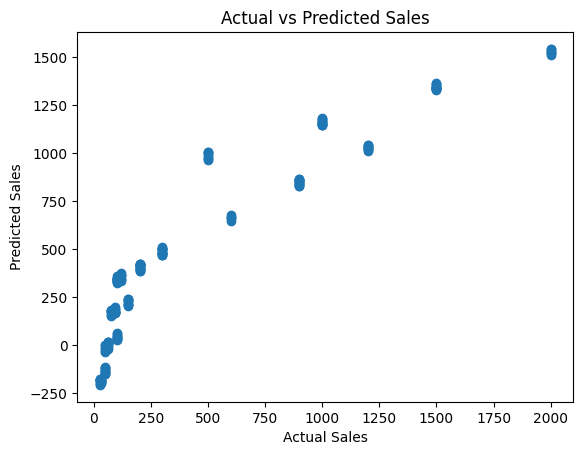

In [ ]:
X_sales = data_sales[['Price per Unit', 'Quantity', 'Age']]
y_sales = data_sales['Total Amount']
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(
    X_sales, y_sales, test_size=0.2, random_state=42
)

model_sales = LinearRegression()
model_sales.fit(X_train_sales, y_train_sales)

y_pred_sales = model_sales.predict(X_test_sales)

mse_sales = mean_squared_error(y_test_sales, y_pred_sales)
r2_sales = r2_score(y_test_sales, y_pred_sales)

print(f"Sales Forecast - MSE: {mse_sales}")
print(f"Sales Forecast - R-squared: {r2_sales}")

plt.scatter(y_test_sales, y_pred_sales)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

2. Email Spam Detection using SVM

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("/content/spam mail.csv", encoding='latin-1')
df.columns = ["Category", "Massages"]
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
corpus = []

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)



Shape of X: (16716, 5000)
Shape of y: (5572,)


In [ ]:
for msg in df['Massages']:
    msg = re.sub('[^a-zA-Z]', ' ', msg).lower().split()
    msg = [ps.stem(word) for word in msg if word not in stopwords.words('english')]
    corpus.append(" ".join(msg))

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(corpus).toarray()
y = df['Category'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.97847533632287
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.86      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



3. Customer Churn Prediction using SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
df = pd.read_csv("/content/churn.csv")
df = df.drop(columns=['customerID'])


In [ ]:
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8069552874378992
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1036
           1       0.70      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



4. Fraud Detection in Credit Card Transactions

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
df = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv")
df = df.sample(frac=0.1, random_state=42)

In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9989468141126909
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.00      0.00      0.00         6

    accuracy                           1.00      5697
   macro avg       0.50      0.50      0.50      5697
weighted avg       1.00      1.00      1.00      5697



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
